In [2]:
import pandas as pd
import numpy as np
from scipy.stats import mode
import missingno as msno
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
sb1907 = pd.read_csv('./datas/seoul_bicycle_201907_1.csv',encoding='cp949')
sb1907_2 = pd.read_csv('./datas/seoul_bicycle_201907_2.csv',encoding='cp949')
sb1907_3 = pd.read_csv('./datas/seoul_bicycle_201907_3.csv',encoding='cp949')

In [174]:
sb2020_78 = pd.read_csv('./datas/seoul_bicycle_2020.07_08.csv',encoding='cp949')

In [182]:
station = pd.read_csv('./datas/location.csv',encoding='cp949')

In [187]:
station[1:20]

,대여소\n번호,보관소(대여소)명,소재지(위치),Unnamed: 3,Unnamed: 4,Unnamed: 5,설치\n시기,설치형태,Unnamed: 8,운영\n방식
1,NaN,NaN,자치구,상세주소,위도,경도,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,거치\n대수,거치\n대수,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,301.0,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451,2015-10-07,16,NaN,LCD
5,302.0,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130,37.575947,126.974060,2015-10-07,12,NaN,LCD
6,303.0,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189,37.571770,126.974663,2015-10-07,8,NaN,LCD
7,304.0,광화문역 2번출구 앞,종로구,서울특별시 종로구 세종대로 지하172,37.572113,126.977577,2021-01-26,NaN,7,QR
8,305.0,종로구청 옆,종로구,서울특별시 종로구 삼봉로 43,37.572582,126.978355,2015-10-07,16,NaN,LCD
9,306.0,광화문역 7번출구 앞,종로구,서울특별시 종로구 세종대로 지하172,37.570808,126.976433,2015-10-07,19,NaN,LCD
10,307.0,서울역사박물관 앞,종로구,서울특별시 종로구 새문안로 55,37.570000,126.971100,2015-10-07,11,NaN,LCD


In [181]:
sb1907
'''
1 : 일반
2 : QR
3 : 새싹따릉이

SPB-21789 -> 1

이용내역 데이터에서 사용할 column : 자전거번호, 대여일시, 대여 대여소번호, 반납일시, 반납대여소번호, 이용시간, 이용거리
station 데이터에서 사용할 column : 대여소번호, 보관소(대여소)명, 소재지, unnamed4, unnamed5
column 명은 모두 영어로
'''

,자전거번호,대여일시,대여 대여소번호,대여 대여소명,대여거치대,반납일시,반납대여소번호,반납대여소명,반납거치대,이용시간,이용거리
0,SPB-21789,2019-07-02 08:35:17,646,장한평역 1번출구 (국민은행앞),4,2019-07-02 08:42:31,3,중랑센터,2,6,1350.0
1,SPB-22363,2019-07-03 08:35:06,646,장한평역 1번출구 (국민은행앞),2,2019-07-03 08:42:28,3,중랑센터,2,7,1160.0
2,SPB-24965,2019-07-03 08:46:07,646,장한평역 1번출구 (국민은행앞),2,2019-07-03 09:09:44,3,중랑센터,14,23,1270.0
3,SPB-21930,2019-07-04 08:49:57,646,장한평역 1번출구 (국민은행앞),4,2019-07-04 09:04:17,3,중랑센터,14,14,1290.0
4,SPB-17709,2019-07-05 08:45:03,529,장한평역 8번 출구 앞,12,2019-07-05 09:11:47,3,중랑센터,14,26,1200.0
...,...,...,...,...,...,...,...,...,...,...,...
799995,SPB-11568,2019-07-22 20:28:29,844,이촌2동 동원베네스트 아파트 앞,10,2019-07-22 20:42:38,823,효창동주민센터 앞,9,14,2370.0
799996,SPB-24122,2019-07-22 20:19:27,119,서강나루 공원,2,2019-07-22 20:44:40,823,효창동주민센터 앞,6,24,4450.0
799997,SPB-22506,2019-07-22 21:32:46,819,선린인터넷 고등학교,2,2019-07-22 21:41:25,823,효창동주민센터 앞,1,8,1170.0
799998,SPB-24122,2019-07-22 21:09:04,823,효창동주민센터 앞,6,2019-07-22 23:04:52,823,효창동주민센터 앞,4,112,8960.0


In [189]:
sb1907['반납대여소명'].unique()

array(['중랑센터', '상암센터 정비실', '이동정비', '(구)합정동 주민센터', '망원역 1번출구 앞',
       '망원역 2번출구 앞', '합정역 1번출구 앞', '합정역 5번출구 앞', '합정역 7번출구 앞',
       '신한은행 서교동금융센터점 앞', '서교동 사거리', '제일빌딩 앞', '사천교', '상수역 2번출구 앞',
       '극동방송국 앞', '홍대입구역 2번출구 앞', '홍대입구역 8번출구 앞', '사루비아 빌딩 앞',
       '일진아이윌아파트 옆', '홍은사거리', '광흥창역 2번출구 앞', '서강나루 공원', '신수동 사거리',
       '마포소방서 앞', '신성기사식당 앞', '문화촌 공원', '서강대 정문 건너편', '서강대 남문 옆',
       '서강대 후문 옆', '현대벤처빌 앞', '신촌역(2호선) 1번출구 옆', '신촌역(2호선) 6번출구 옆',
       '신촌역(2호선) 7번출구 앞', '증산2교', '해담는다리', '연세로 명물길', '명물길 원형무대 앞',
       '대흥동 주민센터', 'NH농협 신촌지점 앞', '신촌동 제1공영주차장 앞', '연세대 정문 건너편',
       '이화여대 후문', '연대 대운동장 옆', '아현역 4번출구 앞', '공덕역 2번출구', '공덕역 8번출구',
       '공덕역 5번출구', '마포역 2번출구 뒤', '마포역 4번출구 뒤', '용강동 주민센터 앞',
       '서강대역 2번출구 앞', '망원1동주민센터', '마포구민체육센터 앞', '성산2교 사거리', '마포구청역',
       '가좌역1 번출구 뒤', '서울서부지방법원 앞', '애오개역 4번출구 앞', '독립문 어린이 공원',
       '이대역 4번 출구', '북아현동 가구거리', '무악재역1번 출구', '봉원고가차도 밑', '명지전문대학교 정문 앞',
       '북가좌1동 주민센터', '중앙근린공원', '가재울 초등학교', '연가초등학교 옆', '북가좌 삼거리',
     

In [20]:
station

,대여소\n번호,보관소(대여소)명,소재지(위치),Unnamed: 3,Unnamed: 4,Unnamed: 5,설치\n시기,설치형태,Unnamed: 8,운영\n방식
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LCD,QR,NaN
1,NaN,NaN,자치구,상세주소,위도,경도,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,거치\n대수,거치\n대수,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,301.0,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451,2015-10-07,16,NaN,LCD
...,...,...,...,...,...,...,...,...,...,...
2156,1089.0,고덕 래미안힐스테이트(201동),강동구,고덕동 675,37.560600,127.146698,2020-01-13,NaN,10,QR
2157,1090.0,상일동역 2번출구 앞,강동구,고덕로 333,37.556789,127.166145,2020-01-13,NaN,10,QR
2158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# 컬럼명 영어로 변경
station.columns=['station_NO','station_name','gu','dong','latitude','longitude','installation_day','install_type','stands_num','operating_type']

In [39]:
station

,station_NO,station_name,gu,dong,latitude,longitude,installation_day,install_type,stands_num,operating_type
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LCD,QR,NaN
1,NaN,NaN,자치구,상세주소,위도,경도,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,거치\n대수,거치\n대수,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,301.0,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451,2015-10-07,16,NaN,LCD
...,...,...,...,...,...,...,...,...,...,...
2156,1089.0,고덕 래미안힐스테이트(201동),강동구,고덕동 675,37.560600,127.146698,2020-01-13,NaN,10,QR
2157,1090.0,상일동역 2번출구 앞,강동구,고덕로 333,37.556789,127.166145,2020-01-13,NaN,10,QR
2158,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2159,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
# station 에서 불필요한 컬럼 제거
station = station.drop(['latitude','longitude','installation_day','install_type','stands_num','operating_type'],axis=1)

KeyError: "['latitude' 'longitude' 'installation_day' 'install_type' 'stands_num'\n 'operating_type'] not found in axis"

In [48]:
station.dropna(axis=0)

,station_NO,station_name,gu,dong
4,301.0,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130
5,302.0,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130
6,303.0,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189
7,304.0,광화문역 2번출구 앞,종로구,서울특별시 종로구 세종대로 지하172
8,305.0,종로구청 옆,종로구,서울특별시 종로구 삼봉로 43
...,...,...,...,...
2153,1085.0,래미안 솔베뉴(고덕로),강동구,양재대로1650
2154,1086.0,래미안 솔베뉴(구천면로),강동구,양재대로1650
2155,1088.0,풍납사거리(강동),강동구,성내동451-3
2156,1089.0,고덕 래미안힐스테이트(201동),강동구,고덕동 675


In [51]:
station['gu'].unique()

array([nan, '자치구', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구',
       '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'],
      dtype=object)

In [67]:
station = station.drop([2158,2159,2160],axis=0)

In [68]:
station

,station_NO,station_name,gu,dong
4,301.0,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130
5,302.0,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130
6,303.0,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189
7,304.0,광화문역 2번출구 앞,종로구,서울특별시 종로구 세종대로 지하172
8,305.0,종로구청 옆,종로구,서울특별시 종로구 삼봉로 43
...,...,...,...,...
2153,1085.0,래미안 솔베뉴(고덕로),강동구,양재대로1650
2154,1086.0,래미안 솔베뉴(구천면로),강동구,양재대로1650
2155,1088.0,풍납사거리(강동),강동구,성내동451-3
2156,1089.0,고덕 래미안힐스테이트(201동),강동구,고덕동 675


<AxesSubplot:>

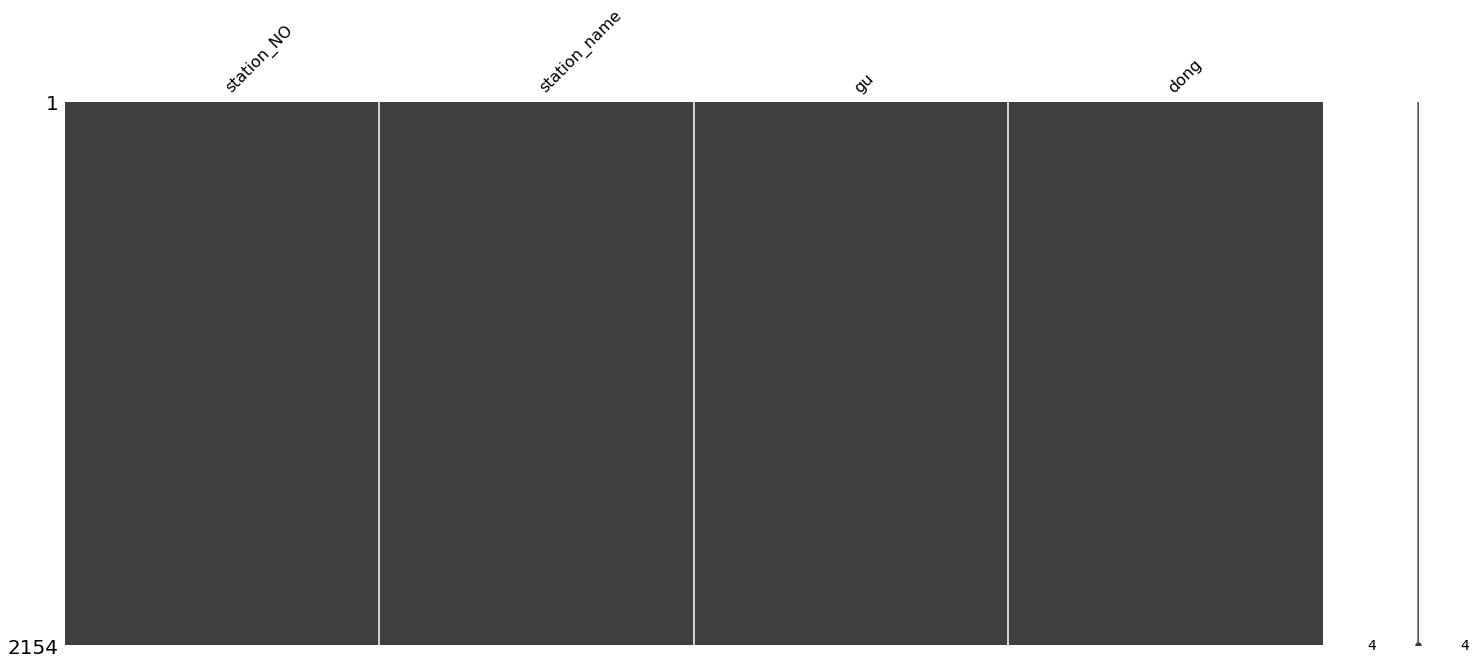

In [69]:
msno.matrix(station)

In [70]:
# 각 컬럼별 nan값 개수 확인
station.isnull().sum()

station_NO      0
station_name    0
gu              0
dong            0
dtype: int64

In [27]:
# nan값의 index를 찾는 함수
def nan_index(searching_column):
    nan_list = []
    for i in enumerate(searching_column):
        if str(i[1]) =='nan':
            nan_list.append(i[0])
    return(nan_list,len(nan_list))

In [28]:
nan_index(station['station_NO'])

([0, 1, 2, 3, 2158, 2159, 2160], 7)

In [72]:
station

,station_NO,station_name,gu,dong
4,301.0,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130
5,302.0,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130
6,303.0,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189
7,304.0,광화문역 2번출구 앞,종로구,서울특별시 종로구 세종대로 지하172
8,305.0,종로구청 옆,종로구,서울특별시 종로구 삼봉로 43
...,...,...,...,...
2153,1085.0,래미안 솔베뉴(고덕로),강동구,양재대로1650
2154,1086.0,래미안 솔베뉴(구천면로),강동구,양재대로1650
2155,1088.0,풍납사거리(강동),강동구,성내동451-3
2156,1089.0,고덕 래미안힐스테이트(201동),강동구,고덕동 675


In [109]:
station = station.astype({'station_NO': 'int'})

# 조건에 맞는 행 검색하기

In [137]:
# 성동구의 따릉이 정류장 번호만 리스트로 저장
seongdong_station = []
seongdong_station = station.loc[station['gu'] == '성동구']['station_NO']
seongdong_station = list(seongdong_station)
seongdong_station

[3511,
 3513,
 3514,
 3515,
 3525,
 3527,
 3530,
 3531,
 3532,
 3538,
 506,
 507,
 508,
 509,
 510,
 511,
 512,
 513,
 514,
 518,
 519,
 520,
 521,
 522,
 523,
 524,
 525,
 526,
 529,
 530,
 533,
 534,
 535,
 536,
 537,
 538,
 550,
 556,
 557,
 558,
 559,
 560,
 561,
 562,
 563,
 564,
 565,
 567,
 568,
 569,
 578,
 579,
 581,
 582,
 583,
 583,
 585,
 586,
 587,
 589,
 594,
 3544,
 3545,
 3547,
 3548,
 3549,
 3550,
 3551,
 3552,
 3553,
 3555,
 3556,
 3557,
 3558,
 3559,
 3560,
 3561,
 3600,
 4353,
 4360,
 4362]

In [115]:
station['station_NO']

4        301
5        302
6        303
7        304
8        305
        ... 
2153    1085
2154    1086
2155    1088
2156    1089
2157    1090
Name: station_NO, Length: 2154, dtype: int64

In [97]:
def column_set(data):
    data = data.drop(['대여일시','반납일시','자전거번호','대여 대여소명','대여거치대','반납거치대','반납대여소명'], axis=1)
    
    return data

In [93]:
column_set(sb1907)

,대여 대여소번호,반납대여소번호,이용시간,이용거리
0,646,3,6,1350.0
1,646,3,7,1160.0
2,646,3,23,1270.0
3,646,3,14,1290.0
4,529,3,26,1200.0
...,...,...,...,...
799995,844,823,14,2370.0
799996,119,823,24,4450.0
799997,819,823,8,1170.0
799998,823,823,112,8960.0


In [116]:
sb1907.loc[sb1907['gu'] == '성동구']

KeyError: 'gu'

In [117]:
sb1907.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   대여 대여소번호  800000 non-null  int64  
 1   반납대여소번호   800000 non-null  int64  
 2   이용시간      800000 non-null  int64  
 3   이용거리      800000 non-null  float64
dtypes: float64(1), int64(3)
memory usage: 24.4 MB


In [146]:
total_1907 = 0

In [149]:
SD_sb1907 = []
for i in sb1907['대여 대여소번호']:
    if i in seongdong_station:
        SD_sb1907.append(i)
total_1907 += len(SD_sb1907)

In [150]:
total_1907

93333

In [136]:
sb1907

,대여 대여소번호,반납대여소번호,이용시간,이용거리
0,646,3,6,1350.0
1,646,3,7,1160.0
2,646,3,23,1270.0
3,646,3,14,1290.0
4,529,3,26,1200.0
...,...,...,...,...
799995,844,823,14,2370.0
799996,119,823,24,4450.0
799997,819,823,8,1170.0
799998,823,823,112,8960.0


In [ ]:
'''
1번 스토리:
등/하원때마다 성수역 앞의 따릉이가 쌓여있는것을 보고
따릉이를 필요한곳에 더, 반납이 많은곳엔 덜 배치해서 따릉이의 이용률을 더 높힐 수 있을까? 라는 의문점에서 출발.

1. 대여소 번호가 많은 순으로 랭킹을 선정해서 수요가 가장 많았던 스테이션을 추려내고
2. 반대로 반납 대여소를 카운트해서 가장 많았던 스테이션도 추려내서

수요가 많은 곳에는 따릉이를 더 배치하고, 반납이 많았던 곳에는 따르이 배치를 덜 해서
효율성과 경제성을 도모 할 수 있는 인사이트 제시




2번 스토리:
코로나팬대믹 이후로 사람들은 따릉이를 더 탈까 덜 탈까?
재택근무의 확대로 유동자체가 적어져서 따릉이 이용 횟수가 적어졌을까?
아니면 팬대믹으로 대중교통 이용에 불안감이 조성되어 따릉이로 출퇴근을 해서 더 많아졌을까?
라는 궁금점에서 출발.

7월과 8월의 비교
1. 19년도 7월과 20년도 7월의 이용량 비교 (코로나의 영향이 있는지)
2. 위 지표들간의 이용시간의 차이, 이용거리의 변화도 있는지 확인.


extra)
풍속, 가시거리, 미세먼지, 초미세먼지, 강수여부, 요일, 휴일여부 등에 대한 수치들을 수집해서 모델링 후
따릉이 수가 부족할것으로 예상되는곳, 따릉이의 반납이 집중될 곳을 예측

계절별, 시간대별 분류
신형따릉이 구형따릉이 미니따릉이에 대한 이용분석
'''

In [ ]:
'''
기간 2019 7~8 / 2020 7~8
지역 : 마포구

'''

In [175]:
sb2020_78['대여일시']
sb2020_78.loc[sb2020_78['대여일시']] == '성동구']['station_NO']

SyntaxError: invalid syntax (<ipython-input-175-3452a8807c77>, line 2)

In [ ]:
sb2020_78['대여일시'].as

In [176]:
# sb2020_78.loc[sb2020_78['대여일시']].split(' ')
q = sb2020_78.astype({'대여일시': 'str'})

In [177]:
list(sb2020_78['대여일시'])

['2020-07-01 00:00:15',
 '2020-07-01 00:00:40',
 '2020-07-01 00:00:17',
 '2020-07-01 00:02:07',
 '2020-07-01 00:01:56',
 '2020-07-01 00:01:09',
 '2020-07-01 00:03:41',
 '2020-07-01 00:01:53',
 '2020-07-01 00:02:16',
 '2020-07-01 00:00:27',
 '2020-07-01 00:01:31',
 '2020-07-01 00:01:30',
 '2020-07-01 00:01:35',
 '2020-07-01 00:00:02',
 '2020-07-01 00:00:23',
 '2020-07-01 00:01:52',
 '2020-07-01 00:03:23',
 '2020-07-01 00:00:02',
 '2020-07-01 00:06:00',
 '2020-07-01 00:05:20',
 '2020-07-01 00:04:50',
 '2020-07-01 00:01:47',
 '2020-07-01 00:05:08',
 '2020-07-01 00:06:15',
 '2020-07-01 00:02:13',
 '2020-07-01 00:04:03',
 '2020-07-01 00:04:45',
 '2020-07-01 00:03:35',
 '2020-07-01 00:04:59',
 '2020-07-01 00:00:36',
 '2020-07-01 00:05:29',
 '2020-07-01 00:05:47',
 '2020-07-01 00:04:39',
 '2020-07-01 00:04:43',
 '2020-07-01 00:02:30',
 '2020-07-01 00:04:08',
 '2020-07-01 00:04:40',
 '2020-07-01 00:03:59',
 '2020-07-01 00:07:48',
 '2020-07-01 00:02:40',
 '2020-07-01 00:02:27',
 '2020-07-01 00:

In [178]:
for i in list(sb2020_78['대여일시']):
    w = i.split(' ')
    if w[0] == '2020-08-01':
        print(list(sb2020_78['대여일시']).index(i))
        break

1353291


In [179]:
w

['2020-08-01', '00:00:01']

In [180]:
sb2020_7 = sb2020_78[:1353291]
sb2020_8 = sb2020_78[1353291:]